Собираемся определить, является ли банкнота истинной или ложной, основываясь на различных измерениях. 

Существует пять измерений:
- длина, длина банкноты в мм;
- высота слева, высота левой стороны банкноты в мм;
- высота справа, высота правой стороны банкноты в мм;
- диагональ, диагональ банкноты в мм;
- нижнее поле, нижнее боковое поле в мм;
- верхнее поле боковой запас в мм;
- Последний столбец is_genuine является целевым.

In [220]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [221]:
df = pd.read_csv('fake_bills.csv', sep=';')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [222]:
df.shape

(1500, 7)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


Есть пустые значения у признака margin_low

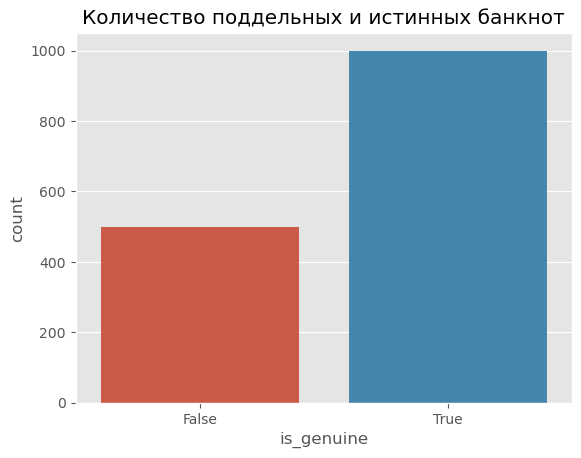

In [224]:
sns.countplot(data=df, x='is_genuine')
plt.title("Количество поддельных и истинных банкнот");

Дисбаланс классов, при обучении модели, может привести к преобладанию класса True

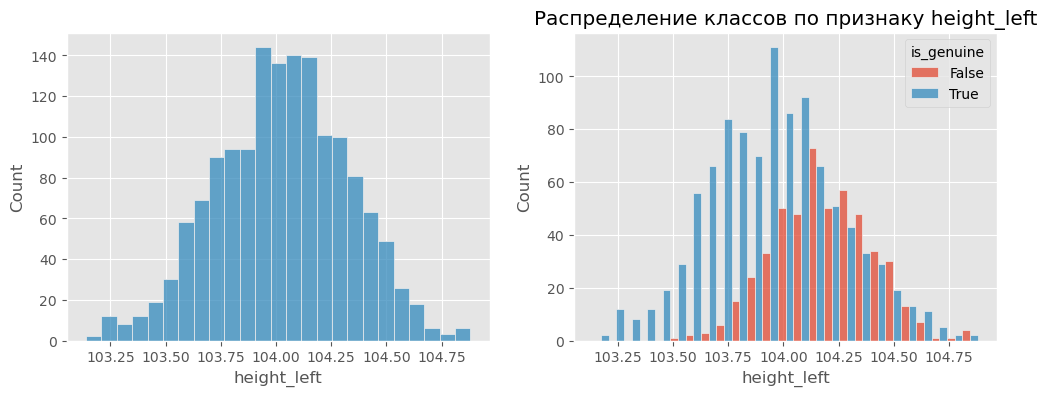

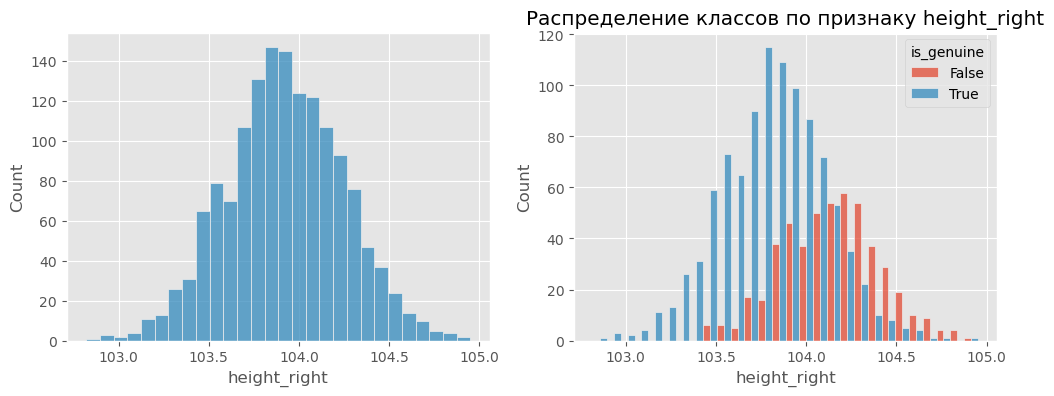

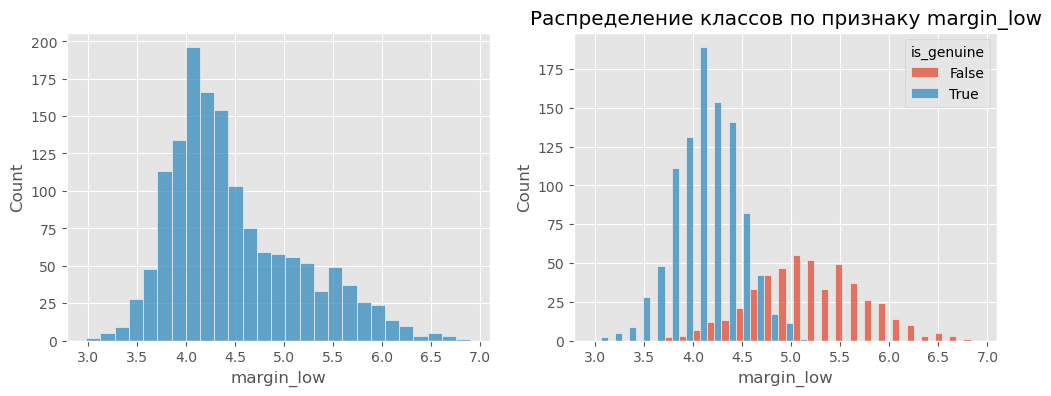

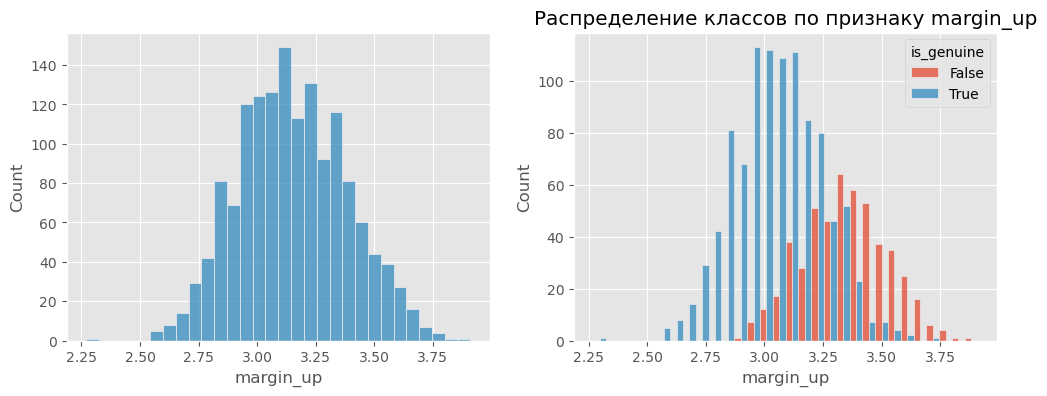

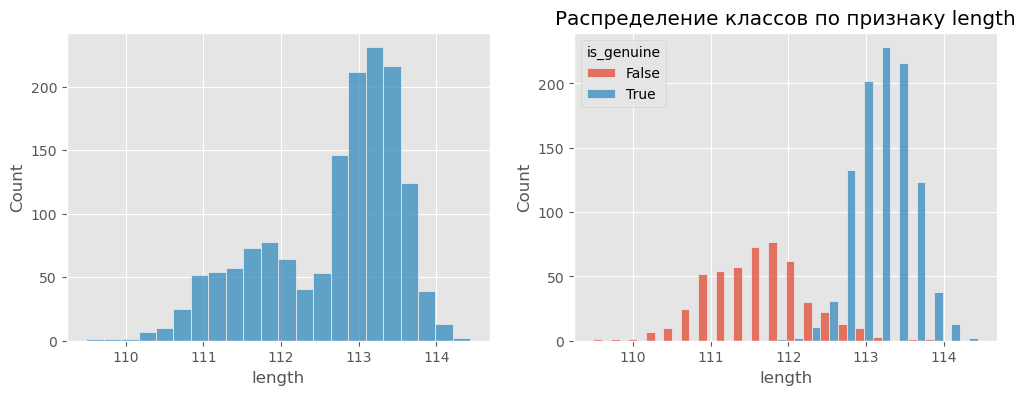

In [271]:
for col in df.columns[2:]:
    fig, ax = plt.subplots(1,2,figsize=(12,4))
    sns.histplot(data=df, x=col, ax=ax[0])
    sns.histplot(data=df, x=col, hue='is_genuine', ax=ax[1], multiple='dodge')
    plt.title(f"Распределение классов по признаку {col}")
    plt.show()

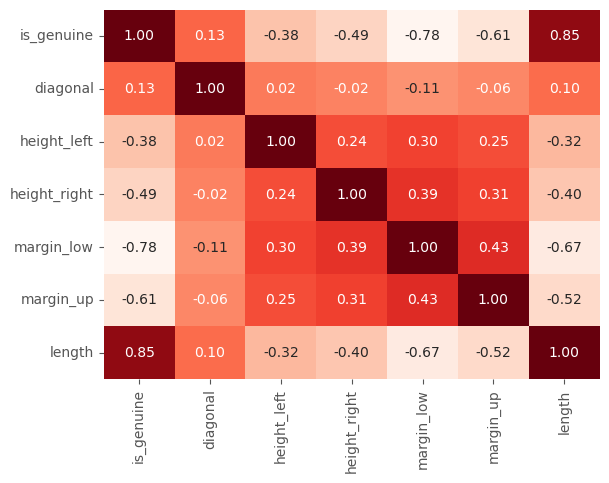

In [226]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cbar=None, cmap='Reds');

Вывод:
- Высокая корреляция между целевым признаком (is_genuine) и margin_low и length;
- Высокая корреляция между нецелевыми признаками margin_low и length, может привести к снижению качества модели.

# Кластеризируем метки класса True, отберем эталонные и обучим модель, чтобы пропорция классов составляла 50 на 50

In [227]:
df_true=df[df.is_genuine==True]

# Стандартизация данных

In [228]:
from sklearn.preprocessing import StandardScaler
x=df_true.iloc[:,1:]
x=np.nan_to_num(x)
scaler= StandardScaler().fit_transform(x) 
scaler

array([[-0.58969535,  3.03541821,  3.91646011,  0.68955149, -0.87051295,
        -1.03633496],
       [-1.75523281, -1.96323946, -0.51008174, -0.29877885, -0.33359014,
        -0.31285111],
       [ 2.34079883,  1.7690916 , -1.05911019,  0.53141863, -0.60205154,
        -0.118067  ],
       ...,
       [-0.68959856, -1.8965907 ,  1.41151782,  0.30739709,  0.09594811,
         1.57933742],
       [-1.82183495,  0.03622361,  0.38208948, -0.41737849, -0.87051295,
         0.02106451],
       [-1.42222211,  0.40279184, -0.78459597, -0.58868908, -0.1725133 ,
        -0.67459304]])

# KMeans, Метод локтя (elbow method), для определения оптимального числа кластеров

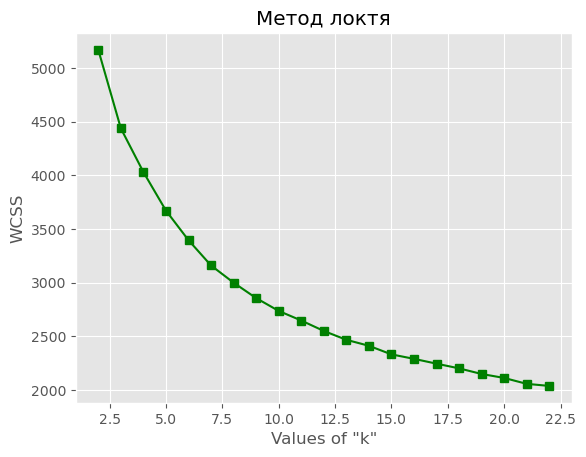

In [229]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

dataset_new = scaler
limit = int((dataset_new.shape[0]//2)**0.5)

wcss_x = []
wcss_y = []
for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset_new)
    wcss_x.append(k)
    wcss_y.append(model.inertia_)
    
plt.plot(wcss_x, wcss_y, 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.title("Метод локтя")
plt.show()

# Оценка Силуэта silhouette score

In [230]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset_new)
    pred = model.predict(dataset_new)
    score = silhouette_score(dataset_new, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.516
Silhouette Score for k = 3: 0.150
Silhouette Score for k = 4: 0.136
Silhouette Score for k = 5: 0.142
Silhouette Score for k = 6: 0.145
Silhouette Score for k = 7: 0.150
Silhouette Score for k = 8: 0.144
Silhouette Score for k = 9: 0.152
Silhouette Score for k = 10: 0.146
Silhouette Score for k = 11: 0.150
Silhouette Score for k = 12: 0.149
Silhouette Score for k = 13: 0.148
Silhouette Score for k = 14: 0.143
Silhouette Score for k = 15: 0.149
Silhouette Score for k = 16: 0.139
Silhouette Score for k = 17: 0.138
Silhouette Score for k = 18: 0.140
Silhouette Score for k = 19: 0.141
Silhouette Score for k = 20: 0.138
Silhouette Score for k = 21: 0.135
Silhouette Score for k = 22: 0.136


Вывод:
- Из рисунка(Метод локтя) видно, что расстояние между к=3 и к=4, не большое, соответственно качество кластеризации стабилизируется, и можно выбрать число кластеров 3;
- Из оценки силуэта выбираем k = 3 т.к score=0.150.

# Кластеризируем на 3 класса

In [231]:
from sklearn.cluster import KMeans
clasternum=3
kmeans = KMeans(init="random", n_clusters=clasternum, n_init=10,max_iter=300, random_state=42)
kmeans.fit(scaler)
label=kmeans.labels_

In [232]:
df_true['Claster']=label

C:\Users\kerie\AppData\Local\Temp\ipykernel_26436\2167233858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true['Claster']=label


In [233]:
df_true=df_true[df_true.Claster!=2]

In [234]:
df_true_0=df_true[df_true.Claster==0]
df_true_0.shape

(483, 8)

In [235]:
df_true_1=df_true[df_true.Claster==1]
df_true_1.shape

(488, 8)

# Оставим по 250 значений из каждого кластера

In [236]:
data_true_0=df_true_0[233:]
data_true_1=df_true_1[238:]

In [237]:
df_true_new=data_true_1.append(data_true_0, ignore_index=True)
df_true_new= df_true_new.drop('Claster', axis=1)
df_true_new

C:\Users\kerie\AppData\Local\Temp\ipykernel_26436\1640343813.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_true_new=data_true_1.append(data_true_0, ignore_index=True)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.95,104.39,103.59,4.69,2.81,113.65
1,True,172.19,104.07,104.02,4.19,3.37,113.27
2,True,171.98,104.36,103.44,4.19,3.20,112.92
3,True,172.13,103.71,103.60,3.59,3.12,113.80
4,True,172.60,104.83,103.56,4.10,2.94,113.38
...,...,...,...,...,...,...,...
495,True,171.66,103.92,103.47,4.26,2.83,113.20
496,True,172.16,103.72,103.61,4.30,2.72,113.51
497,True,171.78,103.38,104.22,4.23,3.07,113.77
498,True,171.44,103.96,103.92,3.68,2.89,113.21


In [238]:
data=df[df.is_genuine==0].append(df_true_new, ignore_index=True)
data

C:\Users\kerie\AppData\Local\Temp\ipykernel_26436\595388229.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=df[df.is_genuine==0].append(df_true_new, ignore_index=True)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,False,172.28,103.95,103.91,4.78,3.31,111.40
1,False,171.92,103.86,104.30,4.96,3.13,111.29
2,False,171.59,104.14,104.38,4.97,3.47,111.22
3,False,172.02,104.33,104.33,5.19,3.21,111.99
4,False,172.55,104.25,104.23,5.60,3.13,111.72
...,...,...,...,...,...,...,...
995,True,171.66,103.92,103.47,4.26,2.83,113.20
996,True,172.16,103.72,103.61,4.30,2.72,113.51
997,True,171.78,103.38,104.22,4.23,3.07,113.77
998,True,171.44,103.96,103.92,3.68,2.89,113.21


# Создадим датасет для прогноза

In [239]:
df_true_1=df_true_1[:13].drop('Claster', axis=1)
df_true_0=df_true_0[:12].drop('Claster', axis=1)
df_true_pred=df_true_1.append(df_true_0, ignore_index=True)
df_true_pred.head()

C:\Users\kerie\AppData\Local\Temp\ipykernel_26436\1630462519.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_true_pred=df_true_1.append(df_true_0, ignore_index=True)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,172.69,104.48,103.50,4.40,2.94,113.16
2,True,171.73,104.28,103.46,4.04,3.48,112.54
3,True,172.34,104.18,103.85,4.58,3.26,112.81
4,True,172.47,103.92,103.67,4.00,3.25,112.85


In [240]:
df_pred=data[:25].append(df_true_pred, ignore_index=True)
df_pred.head()

C:\Users\kerie\AppData\Local\Temp\ipykernel_26436\2010551374.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pred=data[:25].append(df_true_pred, ignore_index=True)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,False,172.28,103.95,103.91,4.78,3.31,111.40
1,False,171.92,103.86,104.30,4.96,3.13,111.29
2,False,171.59,104.14,104.38,4.97,3.47,111.22
3,False,172.02,104.33,104.33,5.19,3.21,111.99
4,False,172.55,104.25,104.23,5.60,3.13,111.72


# Модель Catboost

In [256]:
from catboost import CatBoostClassifier
from catboost import Pool
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [242]:
#Номинативные переменные, меняем на числовые
from sklearn.preprocessing import LabelEncoder

data_new=data[25:]

le=LabelEncoder()

le.fit(data_new.is_genuine)

data_new['is_genuine_int']=le.transform(data_new.is_genuine)
data_new.head()

C:\Users\kerie\AppData\Local\Temp\ipykernel_26436\3288376064.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['is_genuine_int']=le.transform(data_new.is_genuine)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_int
25,False,172.17,104.20,104.13,3.86,3.38,112.44,0
26,False,171.88,103.85,103.96,5.10,3.31,112.64,0
27,False,171.63,104.02,104.66,6.70,3.28,111.28,0
28,False,171.74,104.05,103.93,5.38,3.49,111.34,0
29,False,171.96,104.29,104.03,6.01,3.91,110.83,0


In [243]:
#Отбор признаков
from itertools import combinations
name_columns=list(data_new.iloc[:, 1:-1].columns)
feature = sum([list(map(list, combinations(name_columns, i))) for i in range(len(name_columns) + 1)], [])
feature.pop(0)

[]

In [251]:
le=LabelEncoder()
le.fit(df_pred.is_genuine)
df_pred['is_genuine_int']=le.transform(df_pred.is_genuine)
df_pred.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_int
0,False,172.28,103.95,103.91,4.78,3.31,111.40,0
1,False,171.92,103.86,104.30,4.96,3.13,111.29,0
2,False,171.59,104.14,104.38,4.97,3.47,111.22,0
3,False,172.02,104.33,104.33,5.19,3.21,111.99,0
4,False,172.55,104.25,104.23,5.60,3.13,111.72,0


In [266]:
x_pred=df_pred.iloc[:,1:-1]
y_true=df_pred.iloc[:,-1]

In [269]:
# Данные
x=data_new.iloc[:,1:-1] # Зависимые переменные 
y=data_new.iloc[:,-1] # Прогноз

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)


info=[]

for i in feature:
    train_pool=Pool(data=x_train[i], label=y_train)
    validation_pool=Pool(data=x_test[i],label=y_test)

    model = CatBoostClassifier(
    iterations=15000,
    learning_rate = 0.003,
    random_seed=63,
    custom_loss=['AUC', 'Accuracy'],
    use_best_model=True)
    
    
    model.fit(
    train_pool, 
    eval_set=validation_pool,
    verbose=False,
    plot=False);
    
    pred=model.predict(x_pred[i])
    
    info.append([i,round(metrics.accuracy_score(y_true,pred),2),
                 round(metrics.roc_auc_score(y_true,pred),2)])

In [270]:
info = sorted(info, key=lambda x: (x[1], -x[1]))
for i in info:
    print(i)

[['diagonal'], 0.48, 0.48]
[['height_left'], 0.7, 0.7]
[['height_right'], 0.72, 0.72]
[['diagonal', 'height_right'], 0.72, 0.72]
[['height_left', 'margin_up'], 0.72, 0.72]
[['diagonal', 'height_left', 'margin_up'], 0.72, 0.72]
[['margin_up'], 0.74, 0.74]
[['diagonal', 'height_left'], 0.74, 0.74]
[['diagonal', 'margin_up'], 0.76, 0.76]
[['diagonal', 'height_left', 'height_right'], 0.76, 0.76]
[['height_left', 'height_right'], 0.78, 0.78]
[['height_right', 'margin_up'], 0.82, 0.82]
[['diagonal', 'height_left', 'height_right', 'margin_up'], 0.82, 0.82]
[['diagonal', 'height_right', 'margin_up'], 0.84, 0.84]
[['height_left', 'height_right', 'margin_up'], 0.84, 0.84]
[['height_left', 'margin_low'], 0.88, 0.88]
[['margin_low', 'margin_up'], 0.88, 0.88]
[['margin_low'], 0.9, 0.9]
[['height_right', 'margin_low'], 0.9, 0.9]
[['diagonal', 'height_left', 'margin_low'], 0.9, 0.9]
[['diagonal', 'height_right', 'margin_low'], 0.9, 0.9]
[['diagonal', 'margin_low', 'margin_up'], 0.9, 0.9]
[['height_le

# Вывод

Наилучшее качество моделей, получилось при обучении признаков:
- 'height_right', 'margin_low', 'length';
- 'height_left', 'height_right', 'margin_low', 'length'
- 'diagonal', 'height_left', 'height_right', 'margin_low', 'length';
- 'diagonal', 'height_right', 'margin_low', 'margin_up', 'length';
- 'diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length'.

Метрики(accuracy и roc_auc_score) составили 1.
